In [34]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns
# set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

In [77]:
bed_vars = ['Lummi SW_corrDF','Aiston Preserve_corrDF','Cherry Point-Gulf Rd_corrDF','Coffin Rocks_corrDF','Ebeys Landing_corrDF',
    'Freshwater Bay 1_corrDF','Freshwater Bay 2_corrDF','Hat Island_corrDF', 'Hoypus Point_corrDF', 'North Beach East_corrDF','Polnell Point_corrDF', 
    'Possession Point_corrDF','Shannon Point East_corrDF',
    'Shannon Point West_corrDF']

path = "/Users/carterwebb/Desktop/kelps/data/cleaned_data/corr_dfs/"

name_map = {
    "Lummi SW_corrDF": "Lummi_SW",
    "Aiston Preserve_corrDF": "Aiston_Preserve",
    "Cherry Point-Gulf Rd_corrDF": "Cherry_Point_Gulf_Rd",
    "Coffin Rocks_corrDF": "Coffin_Rocks",
    "Ebeys Landing_corrDF": "Ebeys_Landing",
    "Freshwater Bay 1_corrDF": "Freshwater_Bay_1",
    "Freshwater Bay 2_corrDF": "Freshwater_Bay_2",
    "Hat Island_corrDF": "Hat_Island",
    "Hoypus Point_corrDF": "Hoypus_Point",
    "North Beach East_corrDF": "north_beach_east_clean",
    "Polnell Point_corrDF": "polnell_clean",
    "Possession Point_corrDF": "Possession_Point",
    "Shannon Point East_corrDF": "Shannon_Point_East",
    "Shannon Point West_corrDF": "Shannon_Point_West"
}

In [78]:
def dataimport(bed_vars, path, name_map):
    for var in bed_vars:
        df = pd.read_csv(path + var + ".csv")
        clean_name = name_map[var]
        globals()[clean_name] = df
        print(f"Loaded {var} → variable: {clean_name}")
        

In [79]:
dataimport(bed_vars, path, name_map)

Loaded Lummi SW_corrDF → variable: Lummi_SW
Loaded Aiston Preserve_corrDF → variable: Aiston_Preserve
Loaded Cherry Point-Gulf Rd_corrDF → variable: Cherry_Point_Gulf_Rd
Loaded Coffin Rocks_corrDF → variable: Coffin_Rocks
Loaded Ebeys Landing_corrDF → variable: Ebeys_Landing
Loaded Freshwater Bay 1_corrDF → variable: Freshwater_Bay_1
Loaded Freshwater Bay 2_corrDF → variable: Freshwater_Bay_2
Loaded Hat Island_corrDF → variable: Hat_Island
Loaded Hoypus Point_corrDF → variable: Hoypus_Point
Loaded North Beach East_corrDF → variable: north_beach_east_clean
Loaded Polnell Point_corrDF → variable: polnell_clean
Loaded Possession Point_corrDF → variable: Possession_Point
Loaded Shannon Point East_corrDF → variable: Shannon_Point_East
Loaded Shannon Point West_corrDF → variable: Shannon_Point_West


In [74]:
polnell_clean

,Bed Name,Site Code,Survey Day,Survey Month,Survey Year,Acres,Temp_t,Temp_t_minus1,Temp_t_minus2,Temp_t_minus3,Temp_t_minus4,PctAcreChange
0,Polnell Point,POLN,30.0,8.0,2016.0,36.728040,17.000,14.795,14.795,14.795,14.795,NaN
1,Polnell Point,POLN,18.0,9.0,2017.0,27.432119,13.700,17.000,13.700,13.700,13.700,-25.310147
2,Polnell Point,POLN,10.0,9.0,2018.0,75.709687,13.000,13.700,17.000,13.700,13.700,175.989204
3,Polnell Point,POLN,26.0,9.0,2019.0,47.312350,15.000,13.000,13.700,17.000,13.700,-37.508195
4,Polnell Point,POLN,31.0,8.0,2020.0,41.303716,13.550,15.000,13.000,14.795,17.000,-12.699927
5,Polnell Point,POLN,24.0,8.0,2021.0,36.426616,13.700,13.550,15.000,13.000,14.795,-11.807897
6,Polnell Point,POLN,11.0,9.0,2022.0,17.561865,13.100,13.700,13.550,15.000,13.000,-51.788371
7,Polnell Point,POLN,15.0,8.0,2023.0,38.712918,15.450,13.100,13.700,13.550,15.000,120.437399
8,Polnell Point,POLN,21.0,8.0,2024.0,35.730997,14.275,15.450,13.100,13.700,13.550,-7.702650


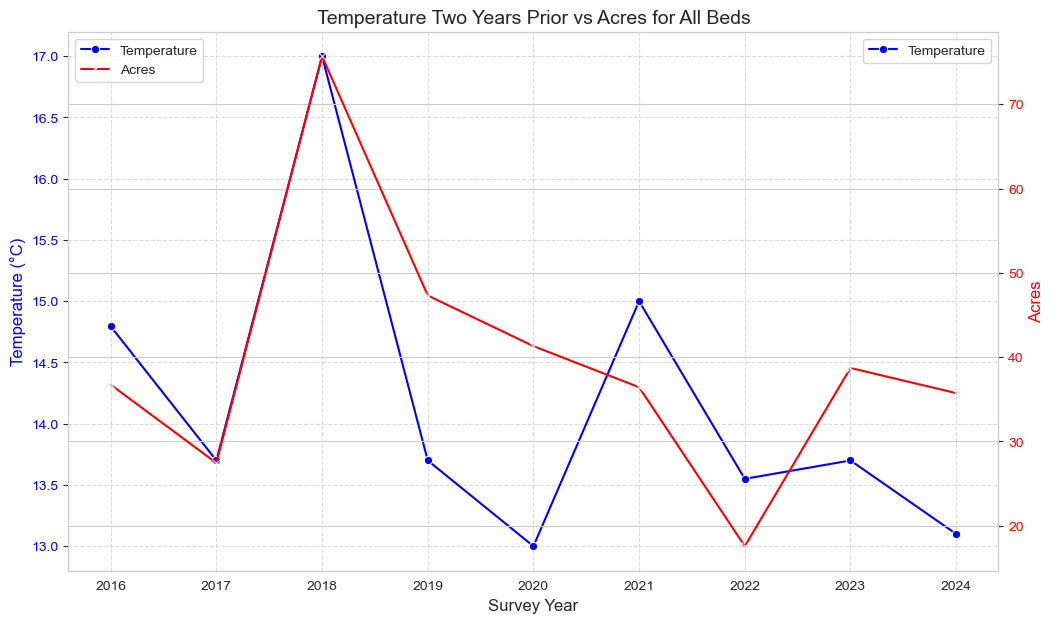

In [76]:
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Temp_t on the first y-axis
sns.lineplot(data=polnell_clean, x='Survey Year', y='Temp_t_minus2', marker='o', ax=ax1, color='blue', label='Temperature')
ax1.set_xlabel('Survey Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot Acres on the second y-axis
sns.lineplot(data=polnell_clean, x='Survey Year', y='Acres', marker='x', ax=ax2, color='red', label='Acres')
ax2.set_ylabel('Acres', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title to the plot
plt.title('Temperature Two Years Prior vs Acres for All Beds', fontsize=14)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


In [ ]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Temp_t on the first y-axis
sns.lineplot(data=polnell_clean, x='Survey Year', y='Temp_t_minus2', marker='o', ax=ax1, color='blue', label='Temperature')
ax1.set_xlabel('Survey Year', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot Percent Acre Change on the second y-axis
sns.lineplot(data=all_beds_df, x='Survey Year', y='PctAcreChange', marker='x', ax=ax2, color='red', label='Acres')
ax2.set_ylabel('Percent Acre Change', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title to the plot
plt.title('Temperature Two Years Prior and Percent Acre Change for All Beds', fontsize=14)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [ ]:
model_all_multiple = smf.ols(formula='PctAcreChange ~ + Temp_t + Temp_t_minus1 + Temp_t_minus2 + Temp_t_minus3 + Temp_t_minus4', data=polnell_clean).fit()

In [ ]:
print(model_all_multiple.summary())

In [ ]:
model_all_single = smf.ols(formula='PctAcreChange ~ Temp_t_minus2', data=all_beds_df).fit()